# MNIST Classification using PCA and Logistic Regression

This project applies **Principal Component Analysis (PCA)** to reduce the dimensionality of the MNIST handwritten digit dataset, followed by **Logistic Regression** to classify the digits. It is inspired by the "Mathematics for Machine Learning" Coursera specialization and aims to combine theoretical understanding with practical implementation.

## Import Required Libraries

These libraries will be used for numerical computation, data visualization, and loading the dataset.


In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load the MNIST Dataset

The dataset contains:
- 70,000 images of handwritten digits (28x28 pixels)
- Each image is flattened into a vector of 784 features


In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert labels to integers
y = y.astype(np.int8)

# Print the shape of the dataset
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Data shape: (70000, 784)
Labels shape: (70000,)


## Compute Basic Statistics

In [4]:
# Compute mean and variance of pixel values
mean_pixel = np.mean(X, axis=0)
var_pixel = np.var(X, axis=0)

# Preview first 5 values
print(f"Mean pixel value (first 5): {mean_pixel[:5]}")
print(f"Variance of pixel value (first 5): {var_pixel[:5]}")

# Overall stats
print("Mean pixel value:", np.mean(X))
print("Pixel value standard deviation:", np.std(X))
print("Pixel range", np.min(X), "to", np.max(X))

# Check label distribution
print("Unique labels:", np.unique(y))

Mean pixel value (first 5): [0. 0. 0. 0. 0.]
Variance of pixel value (first 5): [0. 0. 0. 0. 0.]
Mean pixel value: 33.385964741253645
Pixel value standard deviation: 78.65437362689433
Pixel range 0 to 255
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## Visualize Sample Digits

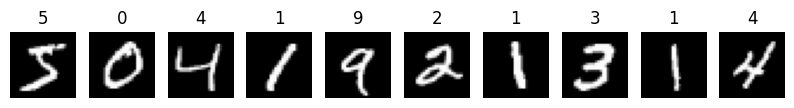

In [5]:
# Plot 10 sample digits
def plot_digits(X, y, num=10):
    plt.figure(figsize=(10, 1))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(y[i])
    plt.show()

plot_digits(X, y)

### Pixel Intensity Distribution of a Single Image

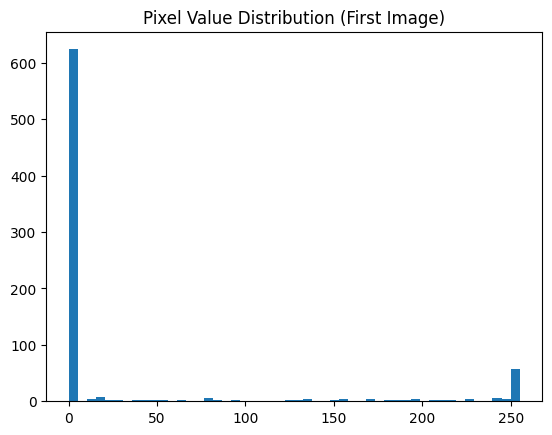

In [6]:
# Plot a histogram of pixel values for the first image in the dataset
plt.hist(X[0].flatten(), bins=50)
plt.title("Pixel Value Distribution (First Image)")
plt.show()

### Normalize the MNIST pixel values (0–255 → 0–1)

In [7]:
# Normalize pixel values to [0, 1]
X_normalized = X / 255.0

print("Min pixel value:", np.min(X_normalized)) 
print("Max pixel value:", np.max(X_normalized))

Min pixel value: 0.0
Max pixel value: 1.0


### Split the Dataset

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training (60,000) and test (10,000)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=10000, train_size=60000, random_state=42
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Training labels shape: (60000,)
Test labels shape: (10000,)


### Save Preprocessed Data

In [9]:
# Save preprocessed data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

### Compute Overall Statistics

In [10]:
print("Mean pixel value:", np.mean(X_train))
print("Pixel value variance:", np.var(X_train))

Mean pixel value: 0.13102828598105934
Pixel value variance: 0.09521077358228369


### Compute Per-Class Mean Images

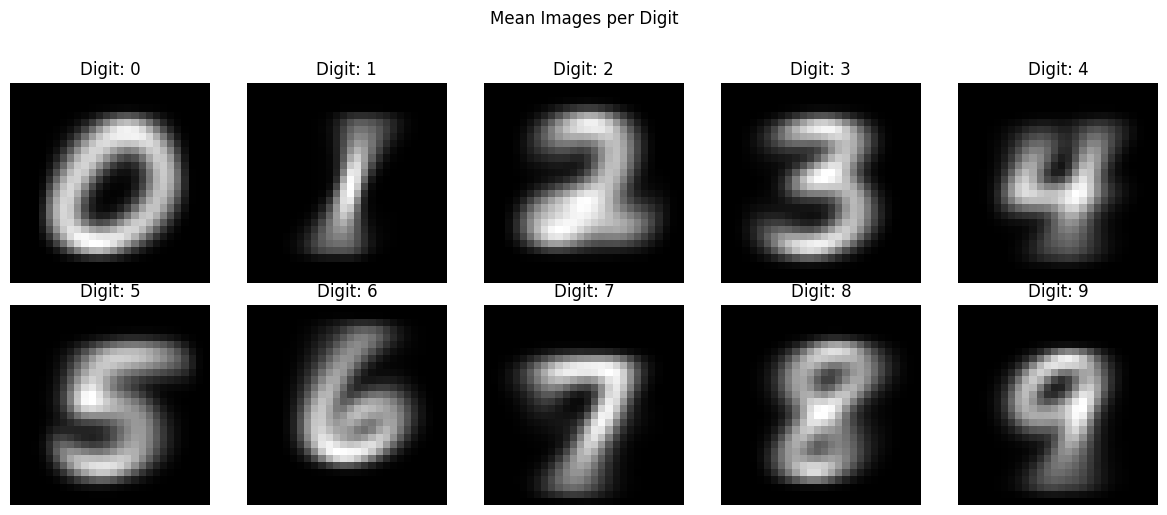

In [11]:
plt.figure(figsize=(12, 5))
for digit in range(10):
    # Get mean image for the current digit
    mean_image = np.mean(X_train[y_train == digit], axis=0)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(mean_image.reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')
plt.suptitle("Mean Images per Digit", y=1.02)
plt.tight_layout()
plt.show()

### Create a Sample Digit Grid

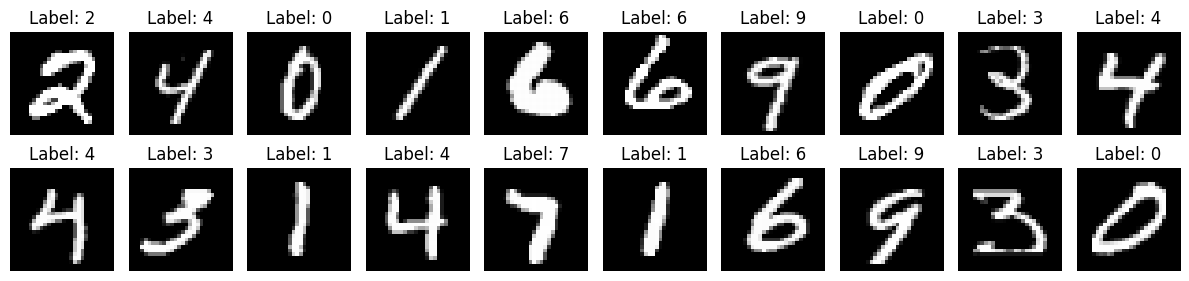

In [13]:
# Plot 20 sample digits
fig, axes = plt.subplots(2, 10, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Pixel intensity histogram

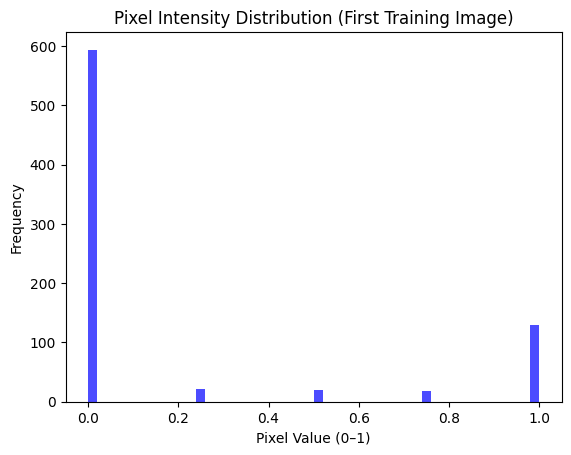

In [14]:
plt.hist(X_train[0].flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution (First Training Image)")
plt.xlabel("Pixel Value (0–1)")
plt.ylabel("Frequency")
plt.show()

### PCA Implementation